# Sieci wielowarstwowe

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

mlb = MultiLabelBinarizer()
mlb.fit(train_data + test_data)
X_train_full = mlb.transform(train_data)
y_train_full = train_labels
X_test = mlb.transform(test_data)
y_test = test_labels

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.33, random_state=42)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
knn.score(X_valid, y_valid)

0.6416969696969697

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [4]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=32, epochs=15)

Epoch 1/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6926 - loss: 0.5589 - val_accuracy: 0.8487 - val_loss: 0.3506
Epoch 2/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8802 - loss: 0.2925 - val_accuracy: 0.8644 - val_loss: 0.3165
Epoch 3/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9054 - loss: 0.2305 - val_accuracy: 0.8335 - val_loss: 0.4113
Epoch 4/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9238 - loss: 0.1939 - val_accuracy: 0.8453 - val_loss: 0.3938
Epoch 5/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9325 - loss: 0.1671 - val_accuracy: 0.8338 - val_loss: 0.4070
Epoch 6/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9456 - loss: 0.1387 - val_accuracy: 0.8051 - val_loss: 0.5677
Epoch 7/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9513 - loss: 0.1256 - val_accuracy: 0.8050 - val_loss: 0.6418
Epoch 8/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9619 - loss: 0.1045 - val_accuracy: 0

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │         159,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,275 (626.08 KB)

 Trainable params: 160,273 (626.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


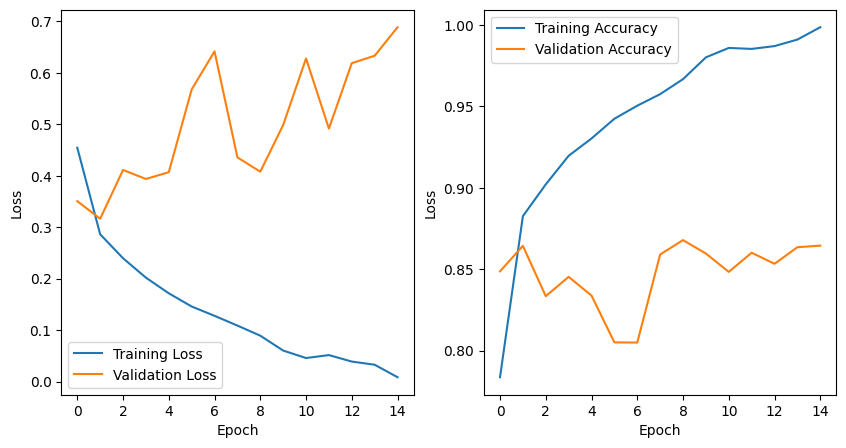

In [6]:
import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
print(history.history.keys())
epoch = range(len(loss))

ax1.plot(epoch, loss, label="Training Loss")
ax1.plot(epoch, val_loss, label="Validation Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epoch, accuracy, label="Training Accuracy")
ax2.plot(epoch, val_accuracy, label="Validation Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(X_train_full, y_train_full, batch_size=32, epochs=4)

Epoch 1/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7446 - loss: 0.5209
Epoch 2/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8864 - loss: 0.2736
Epoch 3/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9138 - loss: 0.2195
Epoch 4/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9265 - loss: 0.1873


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.7862 - loss: 0.5407


In [ ]:
from IPython.display import Markdown
Markdown(f"## Test loss: {test_loss:.2f} \n ## Test accuracy: {test_accuracy:.2f}")

## Test loss: 0.55 
 ## Test accuracy: 0.78

## Zadania

1. [TensorFlow Playground](https://playground.tensorflow.org) to symulator sieci neuronowej pozwalający wizualizować jej działanie. Stwórz kilka sieci o różnych architekturach i sprawdź jak będą działały dla różnych hiperparametrów.
2. Stwórz sieć do klasyfikacji cyfr ze zbioru MNIST.
    - Zbiór składa się z obrazów o wymiarach 28x28. W warstwie input należy podać `shape=(28, 28)` a następnie przekształcić obrazy na wektory stosując warstwę `Flatten`.
    - Testuj różne topologie sieci (różne liczby/rozmiary warstw ukrytych) i różne hiperparametry, np. funkcje aktywacji warstw ukrytych (`sigmoid`, `tanh`, `relu`, ...).
    - Rozmiar warstwy wyjściowej powinien odpowiadać liczbie klas (10). Najlepiej zastosować w niej funkcję aktywacji `softmax`.
    - Dla więcej niż dwóch klas najlepiej stosować `loss="sparse_categorical_crossentropy"`.

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=1)

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


3. Stwórz sieć neuronową dla predykcji cen domów ze zbioru California Housing.
    - Dane można wczytać metodą [`tf.keras.datasets.california_housing.load_data()`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/california_housing/load_data). Dane należy podzielić na zbiór treningowy, walidacyjny i testowy, a następnie standaryzować.
    - Warstwa wyjściowa powinna mieć jeden neuron bez funkcji aktywacji. Jako funkcję błędu stosuj `mse`/`mean_squared_error`, a jako miarę ewaluacji `mae`/`mape`.
    - Dobierz odpowiednią architekturę sieci. Stwórz wykres przedstawiający błąd dla danych treningowych i walidacyjnych.
    - Użyj zbioru testowego do ewaluacji modelu.